## Project 1 
MIST6160

Bank Marketing Campaign Descriptive Analysis

Akanksha Jain

March 19 , 2018

In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [46]:
df= pd.read_csv("train.csv", sep=";")

In [47]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
age               2999 non-null int64
job               2999 non-null object
marital           2999 non-null object
education         2999 non-null object
default           2999 non-null object
housing           2999 non-null object
loan              2999 non-null object
contact           2999 non-null object
month             2999 non-null object
day_of_week       2999 non-null object
duration          2999 non-null int64
campaign          2999 non-null int64
pdays             2999 non-null int64
previous          2999 non-null int64
poutcome          2999 non-null object
emp.var.rate      2999 non-null float64
cons.price.idx    2999 non-null float64
cons.conf.idx     2999 non-null float64
euribor3m         2999 non-null float64
nr.employed       2999 non-null float64
y                 2999 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 492.1+ KB


# bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [49]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,39.889296,255.085028,2.526842,962.227743,0.192064,0.079093,93.584553,-40.578226,3.605769,5165.642314
std,10.282229,256.265737,2.556995,187.599866,0.551960,1.559126,0.581162,4.594237,1.739625,74.384632
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Descriptive statistics of the data shows the mean age of clients is 40years. Average call duration was 255 seconds. Clients were contacted 2 to 3 times for this campaign. 

In [50]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,2999,2999,2999,2999,2999,2999,2999,2999,2999,2999,2999
unique,12,4,7,2,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,743,1812,915,2403,1589,2437,1935,1024,628,2567,2668


In [51]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [52]:
df.groupby("month").count()

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
month,,,,,,,,,,,,,,,,,,,,
apr,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
aug,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451
dec,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
jul,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524
jun,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
mar,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
may,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
nov,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321
oct,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52


Most of the clients were contacted in the month of May, followed by July then August. 

In [53]:
df.groupby("day_of_week").count()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
day_of_week,,,,,,,,,,,,,,,,,,,,
fri,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539
mon,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616
thu,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628
tue,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619
wed,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597


Per the data, day of the week did not matter, clients were contacted everyday of the week.

In [54]:
df.age[:10]


0    30
1    39
2    25
3    38
4    47
5    32
6    32
7    41
8    31
9    35
Name: age, dtype: int64

In [55]:
df.pdays.value_counts()

999    2888
3        39
6        28
4        10
7         8
10        5
5         4
12        4
2         3
15        2
1         2
18        2
11        1
9         1
16        1
0         1
Name: pdays, dtype: int64

In [56]:
df.poutcome.value_counts()

nonexistent    2567
failure         331
success         101
Name: poutcome, dtype: int64

Poutcome is the outcome from previous campaigns, majority of the outcome for previous campaigns is non-existent. 101 were successful.

In [57]:
df.education.value_counts()

university.degree      915
high.school            680
basic.9y               414
professional.course    381
basic.4y               298
basic.6y               173
unknown                138
Name: education, dtype: int64

Almost 30% of the clients have a university degree, over 50% have high school degree. 

In [58]:
df['education'].replace('unknown', np.NaN, inplace = True)

In [59]:
df.education.value_counts()

university.degree      915
high.school            680
basic.9y               414
professional.course    381
basic.4y               298
basic.6y               173
Name: education, dtype: int64

In [60]:
df.education.isnull().sum()

138

In [61]:
df.marital.value_counts()

married     1812
single       856
divorced     322
unknown        9
Name: marital, dtype: int64

In [62]:
df.groupby("marital").count()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,,,,,,,,,,
divorced,322,322,307,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322
married,1812,1812,1733,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812
single,856,856,812,856,856,856,856,856,856,856,856,856,856,856,856,856,856,856,856,856
unknown,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [63]:
df['marital'].replace('unknown', np.NaN, inplace = True)

In [64]:
df["marital"].fillna(df["marital"].mode(), inplace=True)

In [65]:
df.marital.value_counts()

married     1812
single       856
divorced     322
Name: marital, dtype: int64

In [66]:
df.default.value_counts()

no         2403
unknown     596
Name: default, dtype: int64

In [67]:
df['default'].replace('unknown', np.NaN, inplace = True)

In [68]:
df["default"].fillna(df["default"].mode(), inplace=True)

In [69]:
df.default.value_counts()

no    2403
Name: default, dtype: int64

In [70]:
df.loan.value_counts()

no         2437
yes         485
unknown      77
Name: loan, dtype: int64

In [71]:
df["loan"].fillna(df["loan"].mode(), inplace=True)

In [72]:
df.loan.value_counts()

no         2437
yes         485
unknown      77
Name: loan, dtype: int64

In [73]:
df['loan'].replace('unknown', np.NaN, inplace = True)

In [74]:
df.contact.value_counts()

cellular     1935
telephone    1064
Name: contact, dtype: int64

In [75]:
df.month.value_counts()

may    1024
jul     524
aug     451
jun     383
nov     321
apr     151
oct      52
sep      50
mar      29
dec      14
Name: month, dtype: int64

In [76]:
df.day_of_week.value_counts()

thu    628
tue    619
mon    616
wed    597
fri    539
Name: day_of_week, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
age               2999 non-null int64
job               2999 non-null object
marital           2990 non-null object
education         2861 non-null object
default           2403 non-null object
housing           2999 non-null object
loan              2922 non-null object
contact           2999 non-null object
month             2999 non-null object
day_of_week       2999 non-null object
duration          2999 non-null int64
campaign          2999 non-null int64
pdays             2999 non-null int64
previous          2999 non-null int64
poutcome          2999 non-null object
emp.var.rate      2999 non-null float64
cons.price.idx    2999 non-null float64
cons.conf.idx     2999 non-null float64
euribor3m         2999 non-null float64
nr.employed       2999 non-null float64
y                 2999 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 492.1+ KB


In [78]:
bins = [18, 25, 35, 45, 55, 65, 100]
df['age']=pd.cut(df['age'], bins)

In [79]:
df['age'].value_counts()

(25, 35]     1105
(35, 45]      906
(45, 55]      606
(55, 65]      224
(18, 25]      121
(65, 100]      34
Name: age, dtype: int64

In [80]:
df.pdays.value_counts()


999    2888
3        39
6        28
4        10
7         8
10        5
5         4
12        4
2         3
15        2
1         2
18        2
11        1
9         1
16        1
0         1
Name: pdays, dtype: int64

In [81]:
df.select_dtypes(['category']).columns

Index(['age'], dtype='object')

In [82]:
df.pdays.value_counts()

999    2888
3        39
6        28
4        10
7         8
10        5
5         4
12        4
2         3
15        2
1         2
18        2
11        1
9         1
16        1
0         1
Name: pdays, dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
age               2996 non-null category
job               2999 non-null object
marital           2990 non-null object
education         2861 non-null object
default           2403 non-null object
housing           2999 non-null object
loan              2922 non-null object
contact           2999 non-null object
month             2999 non-null object
day_of_week       2999 non-null object
duration          2999 non-null int64
campaign          2999 non-null int64
pdays             2999 non-null int64
previous          2999 non-null int64
poutcome          2999 non-null object
emp.var.rate      2999 non-null float64
cons.price.idx    2999 non-null float64
cons.conf.idx     2999 non-null float64
euribor3m         2999 non-null float64
nr.employed       2999 non-null float64
y                 2999 non-null object
dtypes: category(1), float64(5), int64(4), object(11)
memory usage: 471

In [84]:
df.job.value_counts()

admin.           743
blue-collar      644
technician       496
services         294
management       233
retired          118
self-employed    114
entrepreneur     112
unemployed        85
housemaid         70
student           58
unknown           32
Name: job, dtype: int64

In [85]:
df['job'].replace('unknown', np.NaN, inplace = True)

In [86]:
df['job'].fillna(method="ffill")
df.job.value_counts()

admin.           743
blue-collar      644
technician       496
services         294
management       233
retired          118
self-employed    114
entrepreneur     112
unemployed        85
housemaid         70
student           58
Name: job, dtype: int64

In [87]:
df.columns[df.isnull().any()].tolist()

['age', 'job', 'marital', 'education', 'default', 'loan']

In [88]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['age'], dtype='object')

In [89]:
df =df.astype({'marital': 'category',
              'education': "category"})

In [90]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['age', 'marital', 'education'], dtype='object')

In [91]:
df.housing.value_counts()

yes        1589
no         1333
unknown      77
Name: housing, dtype: int64

In [92]:
df.replace('unknown', np.NaN, inplace = True)

In [93]:
df["housing"].fillna(df["housing"].mode(), inplace=True)

In [94]:
df.housing.value_counts()

yes    1589
no     1333
Name: housing, dtype: int64

In [95]:
df.y.value_counts()

no     2668
yes     331
Name: y, dtype: int64

In [96]:
df =df.astype({'education': 'category',
              'default': "category",
              'housing':'category',
              'loan': 'category',
              'contact': 'category',
              'month': 'category',
              'day_of_week': 'category',
              'poutcome': 'category',
              'campaign': 'float',
              'previous': 'float',
              'emp.var.rate': 'float',
              'cons.price.idx': 'float',
              'euribor3m': 'float',
              'nr.employed': 'float',
              'y': 'category'})

In [97]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [98]:
num_columns = df.select_dtypes(['int64', 'float64']).columns
num_columns

Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [99]:
import matplotlib.pyplot as plt

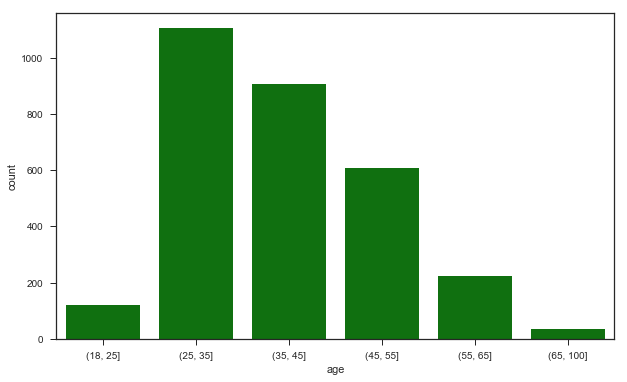

In [100]:
plt.subplots(figsize=(10,6))
sns.countplot(df.age, color= 'g')
plt.show()

It can be seen from the chart that majority of targeted clients were in the age range of 25 yrs to 34 yrs and 35yrs to 45 yrs old, over 1200 clients and 900 clients. Less than 200 clients where below 25 yrs and over 65 yrs.

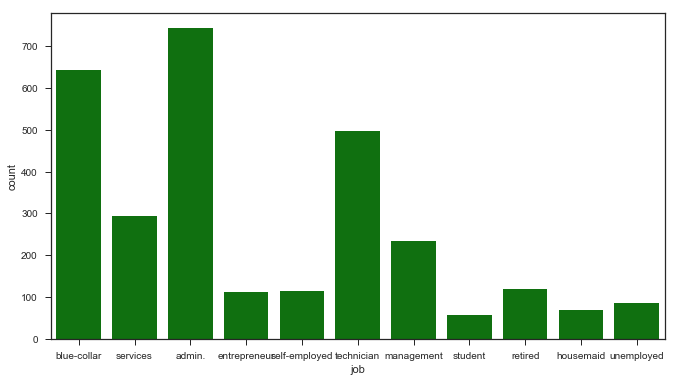

In [101]:
plt.subplots(figsize=(11,6))
sns.countplot(df.job, color= 'g')
plt.show()

The bar chart shows most of the clients called by the bank were in admin, blue-collar and technician job. Students, housemaid, unemployed made up of less then 100 clients in each job category. Around 300 clients with services, management jobs were contacted for the campaign. 

In [102]:
df.rename(columns = {'emp.var.rate': 'emp_var_rate'}, inplace = True)

In [103]:
df.emp_var_rate.value_counts()

 1.4    1177
-1.8     653
 1.1     551
-0.1     279
-2.9     113
-3.4      75
-1.1      69
-1.7      68
-3.0      13
-0.2       1
Name: emp_var_rate, dtype: int64

In [104]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, row="y", col="age", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "poutcome", bins=bins, lw=0)
plt.show()

ValueError: color kwarg must have one color per dataset

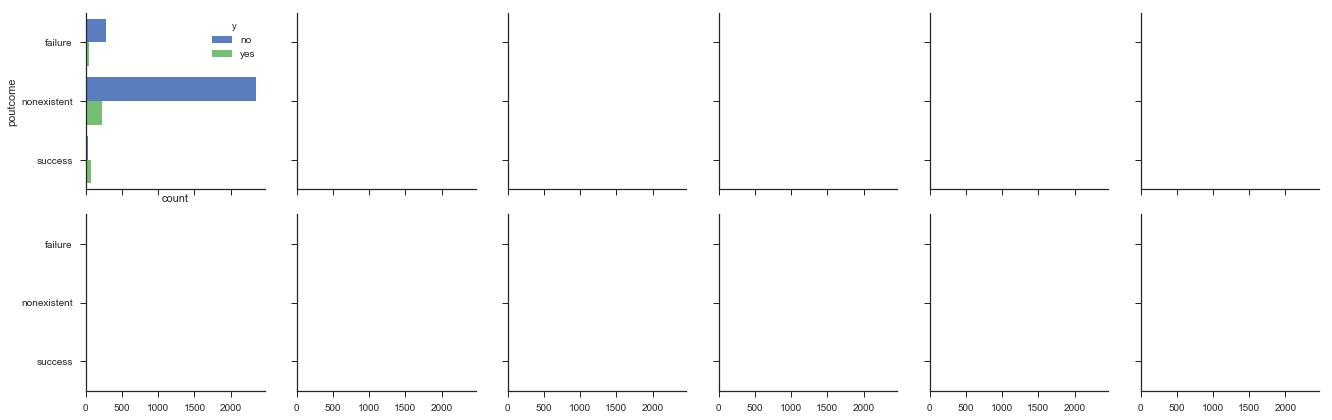

In [105]:
sns.set_palette("muted")
sns.countplot(y="poutcome", hue="y", data=df)
plt.show()

The count plot shows how that outcome of the previous campaign were nonexistant for most of the clients. Clients response was 'No' for most campaigns that failed and 'Yes' for most campaigns that were successful. 

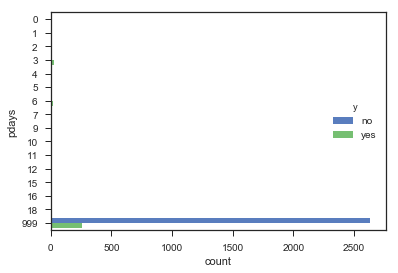

In [106]:
sns.set_palette("muted")
sns.countplot(y="pdays", hue="y", data=df)
plt.show()

The count plot for pdays shows that most of the clients were never contacted before. Over 250 clients responded 'No' to the current campaign and less than 500 responded 'Yes' to the current campaign. 

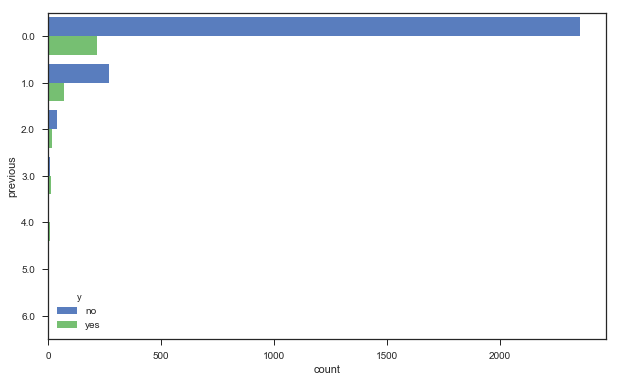

In [107]:
plt.subplots(figsize=(10,6))
sns.set_palette("muted")
sns.countplot(y="previous", hue="y", data=df)
plt.show()

It can be seen from the bar graph, that most of the clients were never contact before for any other campaign. They were contact first time for the current campaign, of which over 2000 clients responded 'No' and less than 500 clients responded 'Yes'. Less than 400 clients were contacted second time for the campaign. 

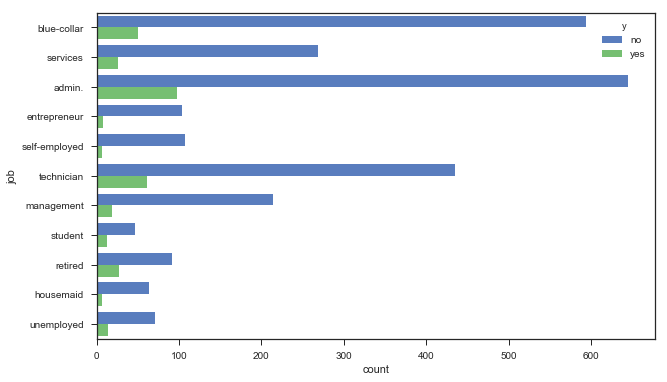

In [114]:
plt.subplots(figsize=(10,6))
sns.set_palette("muted")
sns.countplot(y="job", hue="y", data=df)
plt.show()

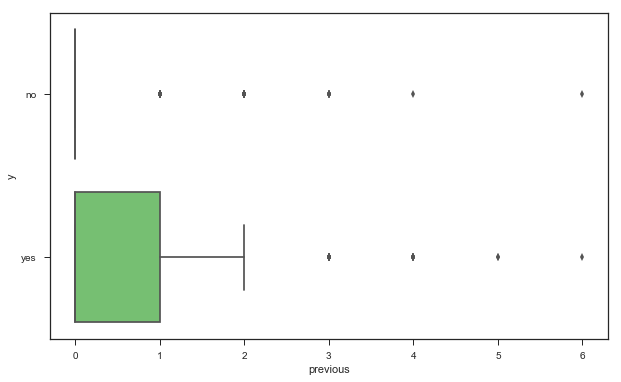

In [108]:
plt.subplots(figsize=(10,6))
sns.boxplot(x= df.previous, y= df.y, data=df, whis = 1.5, palette="muted")
plt.show()

The boxplot shows that most of the clients that declined were contacted for this campaign for the first time by the bank. Clients who responsed Yes to the contacted were contacted once or twice before for other campaigns. 

In [109]:
df.groupby('y')[['duration', 'campaign']].agg({'duration': 'mean', 'campaign': 'mean'}) 

,duration,campaign
y,,
no,216.016867,2.602699
yes,569.990937,1.915408


Clients who said yes were contacted twice for this campaign and the call duration was over 9 mins. For clients who responsed no to the campaign were contacted 2.6 times and the call duration was around 3 mins. 

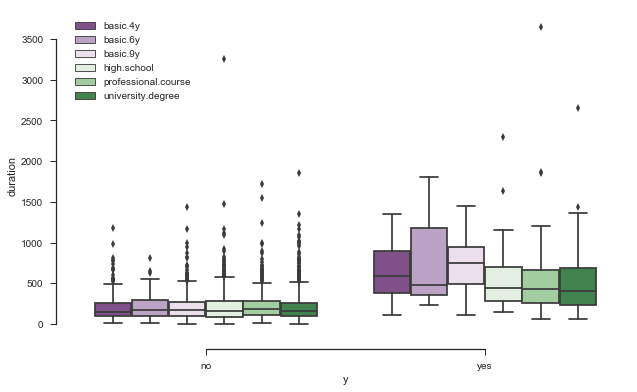

In [110]:
sns.set(style="ticks")
plt.subplots(figsize=(10,6))
sns.boxplot(x="y", y="duration", hue="education", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.legend(loc='upper left')
plt.show()

The boxplot were tall for all education categories for clients who responded 'Yes', the call duration was longer with median call duration of 500 seconds for each category. Also most of the clients that said Yes had basic.6y education. 
The boxplot for clients who responded 'No' to this campaign were smaller with median call duration less than 200 seconds. This was consistent in all the education category. 

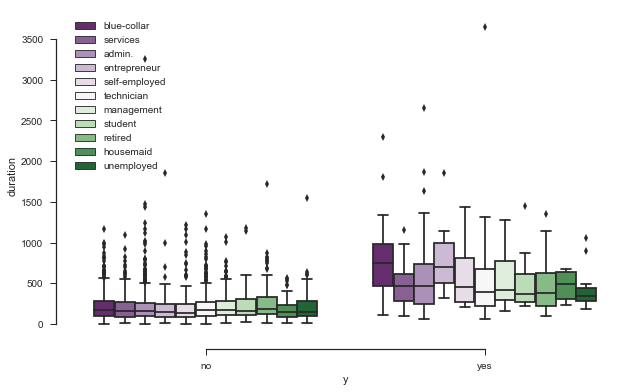

In [111]:
sns.set(style="ticks")
plt.subplots(figsize=(10,6))
sns.boxplot(x="y", y="duration", hue="job", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.legend(loc='upper left')
plt.show()

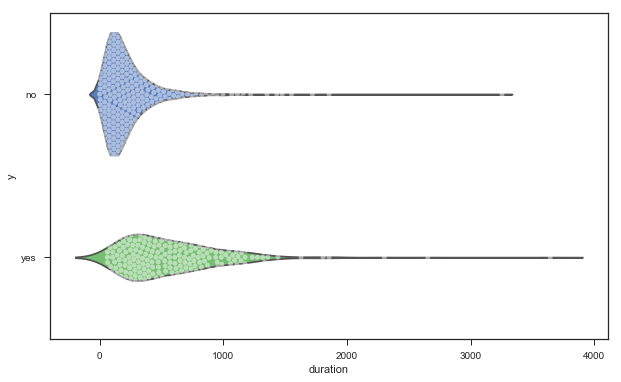

In [80]:
plt.subplots(figsize=(10,6))
sns.violinplot(x="duration", y="y", data=df, inner=None)
sns.swarmplot(x="duration", y="y", data=df, color="w", alpha=.5)
plt.show()

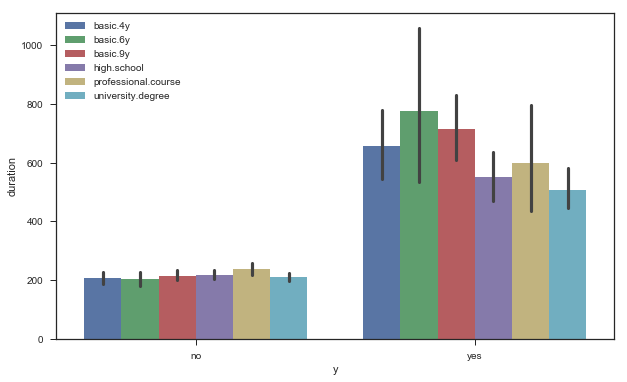

In [78]:
plt.subplots(figsize=(10,6))
sns.barplot(x="y", y="duration", hue="education", data=df)
plt.legend(loc='upper left')
plt.show()

The above barplot is consistent with the boxplot. Call durations were significantly higher for clients who responded 'Yes'  compared to those who said 'No'.

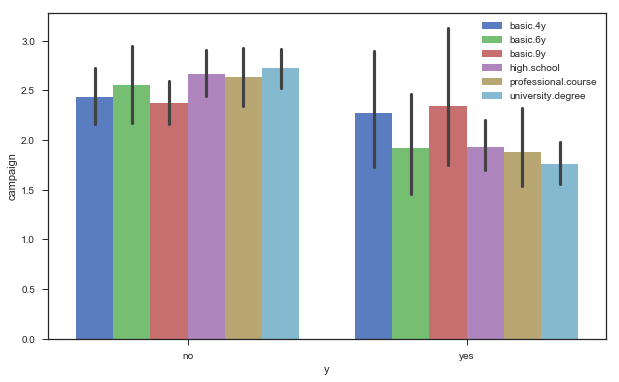

In [87]:
plt.subplots(figsize=(10,6))
sns.barplot(x="y", y="campaign", hue="education", data=df)

plt.legend(loc='upper right')
plt.show()

The bar graph shows the number of times clients were contacted for the current campaign. Clients who responded 'No' were contacted 2 to 2.5 times. Clients who reponded 'Yes' were contacted 2 or less times. 
Clients with university degree where contacted the most who responded No, and contacted the least who said Yes. 

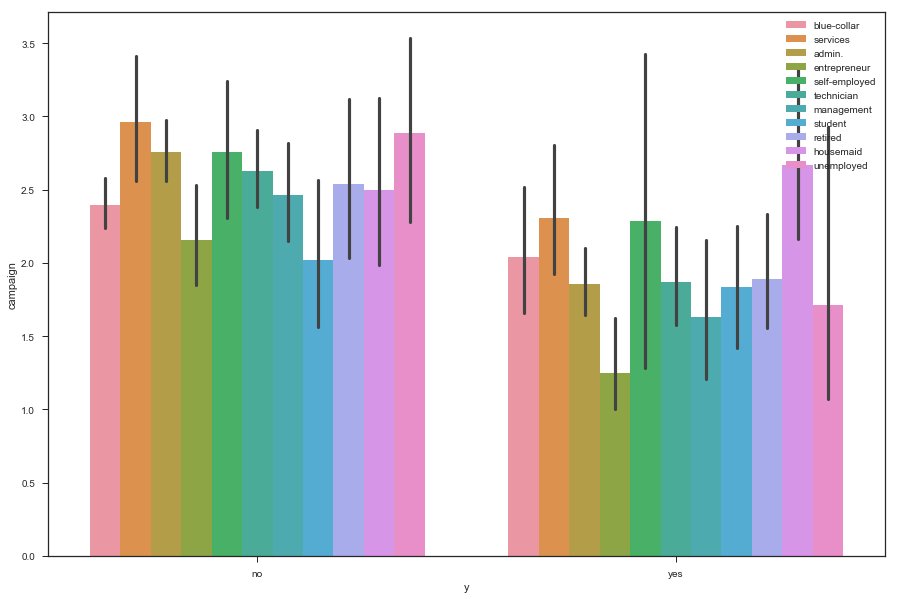

In [113]:
plt.subplots(figsize=(15,10))
sns.barplot(x="y", y="campaign", hue="job", data=df)

plt.legend(loc='upper right')
plt.show()

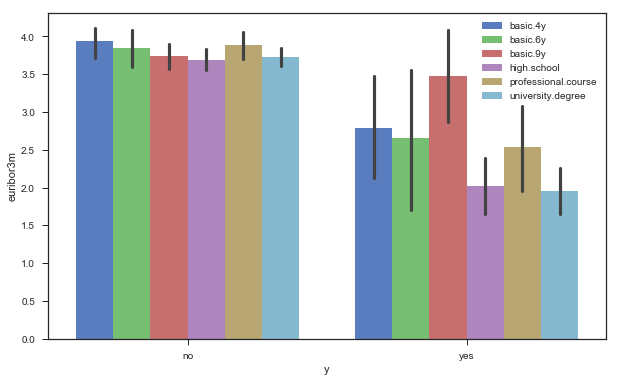

In [88]:
plt.subplots(figsize=(10,6))
sns.barplot(x="y", y="euribor3m", hue="education", data=df)

plt.legend(loc='upper right')
plt.show()

euribor3m rate were consistent over 3.5% for clients who responded 'No'for all education types. For clients who responded 'Yes' the rate was lowest for clients with university degree and high school education around 2.0. It was highest for clients with basic.9y education, 3.5%  and between 2.5%-3% for clients with basic 4y,6y and professional degree. 

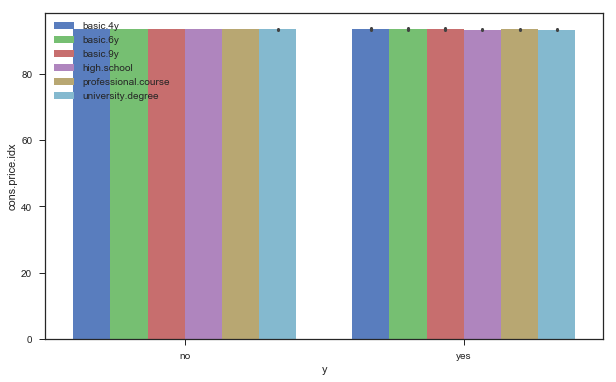

In [89]:
plt.subplots(figsize=(10,6))
sns.barplot(x="y", y="cons.price.idx", hue="education", data=df)
plt.legend(loc='upper left')
plt.show()

Cons Price Index had no relation to the education of clients or response. 

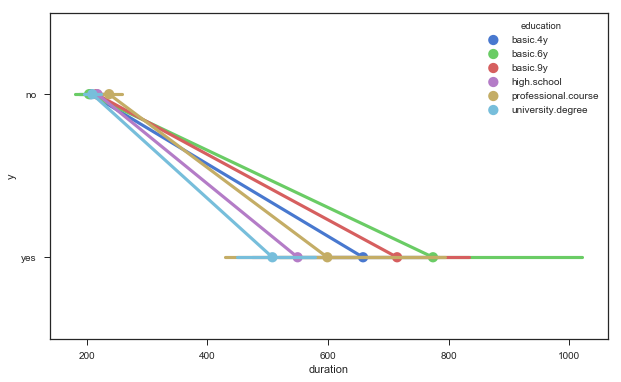

In [90]:
plt.subplots(figsize=(10,6))
sns.pointplot(x="duration", y="y", hue="education", data=df);
plt.show()

The point plot shows that call duration for clients with univerity degrees who accepted or declined the campaign was the shorted. For clients who responded 'Yes' it was the highest for clients with basic6y,9y and 4y education. 
The call duration for all clients were short who repsonded 'No' to the campaign.

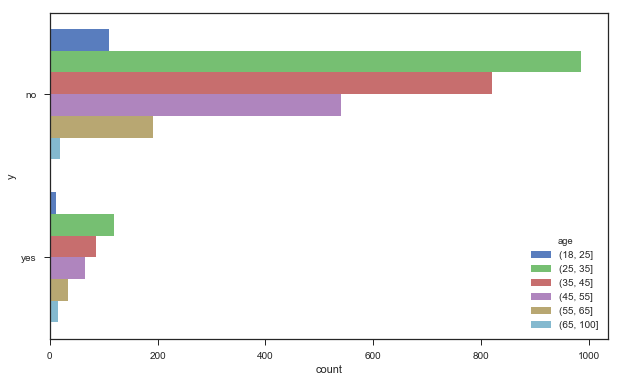

In [91]:
plt.subplots(figsize=(10,6))
sns.countplot(y="y", hue="age", data=df)
plt.show()

The bar plot shows that most o the clients that responded either 'No' or 'Yes' to the campaign were in the age group of 25 yrs to 45 yrs. 

In [86]:
df.pivot_table(index=['age', 'marital'],
               values = 'duration', 
               columns='y', 
               aggfunc='mean', 
               fill_value=0) # specify aggregation function & behavior of empty cells

y                           no          yes
age       marital                          
(18, 25]  divorced  273.000000     0.000000
          married   176.545455    89.000000
          single    229.494118   470.909091
(25, 35]  divorced  223.339623   735.400000
          married   202.929435   649.739130
          single    209.538106   532.235294
(35, 45]  divorced  197.408163   554.900000
          married   218.121157   552.276596
          single    227.508876   549.629630
(45, 55]  divorced  254.092784   859.700000
          married   221.498753   578.673469
          single    214.720930   559.666667
(55, 65]  divorced  193.818182   471.666667
          married   226.673469   575.500000
          single    119.250000  1234.000000
(65, 100] divorced  187.714286   655.000000
          married   261.000000   431.571429
          single    167.000000   347.000000

In [87]:
df.pivot_table(index=['age', 'marital'],
               values = 'duration', 
               columns='y', 
               aggfunc='count', 
               fill_value=0) # specify aggregation function & behavior of empty cells

y                    no  yes
age       marital           
(18, 25]  divorced    2    0
          married    22    1
          single     85   11
(25, 35]  divorced   53    5
          married   496   46
          single    433   68
(35, 45]  divorced   98   10
          married   553   47
          single    169   27
(45, 55]  divorced   97   10
          married   401   49
          single     43    6
(55, 65]  divorced   33    6
          married   147   26
          single      8    1
(65, 100] divorced    7    1
          married    10   14
          single      1    1

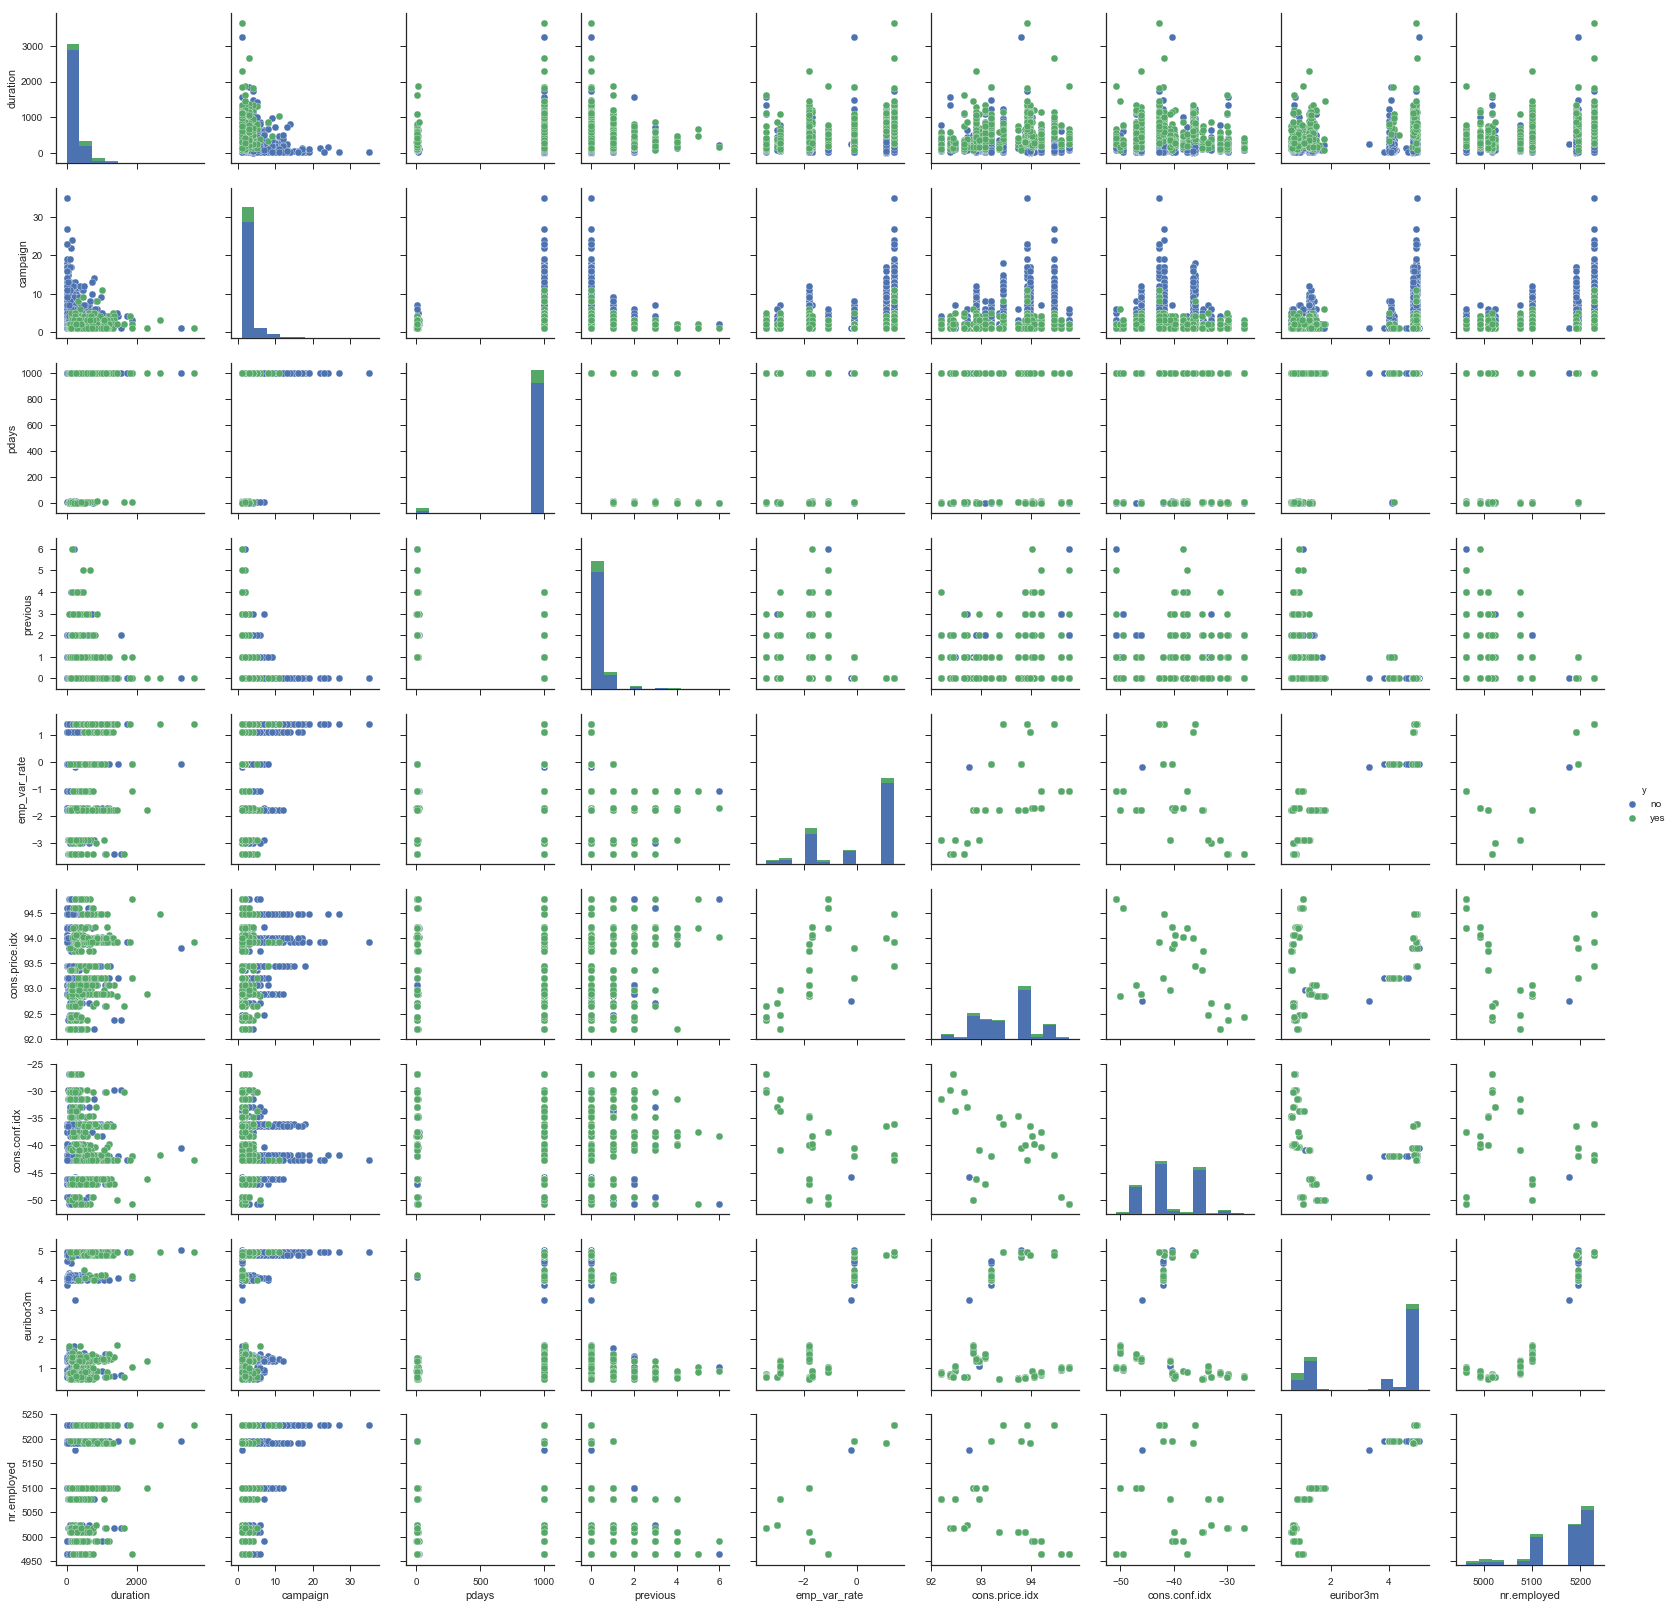

In [90]:
sns.set(style="ticks")
sns.pairplot(df, hue="y")
plt.show()

The histogram shows over 1500 calls lasted for little less than 200 seconds. Around 150 calls lasted inbetween 600- 1100 seconds. Approx 50-60 calls lasted over 1200 seconds. 

#1- the call durtion is a good predcitor - though it is not clear it is the cause or aftereffect
#2-education is important to take quick decisions either way
#3-previous contacts and number of campaigns and the time since last contcts are other key predictors
   ##3a- number of previous contacts made and recently contacted are more likely to say yes to deposits
#4- in general single people less then 40 are more likely to say yes comapred to th older ones
#5-married people less than 25 yrs of age( most probably newly married) are easy to convince (low duration)
#6-most of the people are in agegroup of 25-45 (~67%) and among them single and divorced ones are more likley to say   yes comapred to married